In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
import seaborn as sns


In [51]:
plt.style.available[5:]


['classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [39]:
df = pd.read_csv('dataset/TLKM.csv')
df['date'] = pd.to_datetime(df['date'])

In [40]:
# Tampilkan lima baris pertama dari dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   74 non-null     datetime64[ns]
 1   previous               74 non-null     float64       
 2   open_price             74 non-null     float64       
 3   first_trade            74 non-null     float64       
 4   high                   74 non-null     float64       
 5   low                    74 non-null     float64       
 6   close                  74 non-null     float64       
 7   change                 74 non-null     float64       
 8   volume                 74 non-null     float64       
 9   value                  74 non-null     float64       
 10  frequency              74 non-null     float64       
 11  index_individual       74 non-null     float64       
 12  offer                  74 non-null     float64       
 13  offer_v

In [75]:
df_features = df.columns.drop(['date', 'close'])

In [83]:
# Urutkan data berdasarkan tanggal
df = df.sort_values('date')

# Pilih fitur dan target
features = ['previous', 'open_price', 'first_trade', 'high', 'low', 'index_individual', 'offer', 'bid']
X = df[features]
y = df['close']

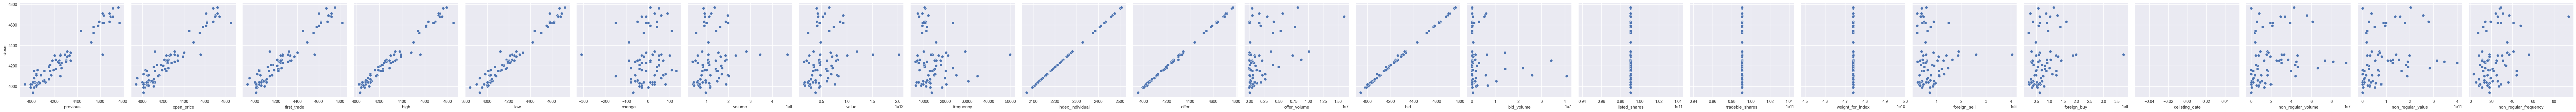

In [82]:
sns.pairplot(df, x_vars=df_features, y_vars='close', height=4)

In [84]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the entire dataset
y_pred_all = model.predict(X)

In [85]:
# Create a new DataFrame for plotting
results_df = pd.DataFrame({
    'date': df['date'],
    'actual': df['close'],
    'predicted': y_pred_all
})

In [86]:

# Print metrics
mse = mean_squared_error(y_test, model.predict(X_test))
r2 = r2_score(y_test, model.predict(X_test))
print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')

Mean Squared Error: 0.0032984495531524975
R-squared Score: 0.9999997061485788


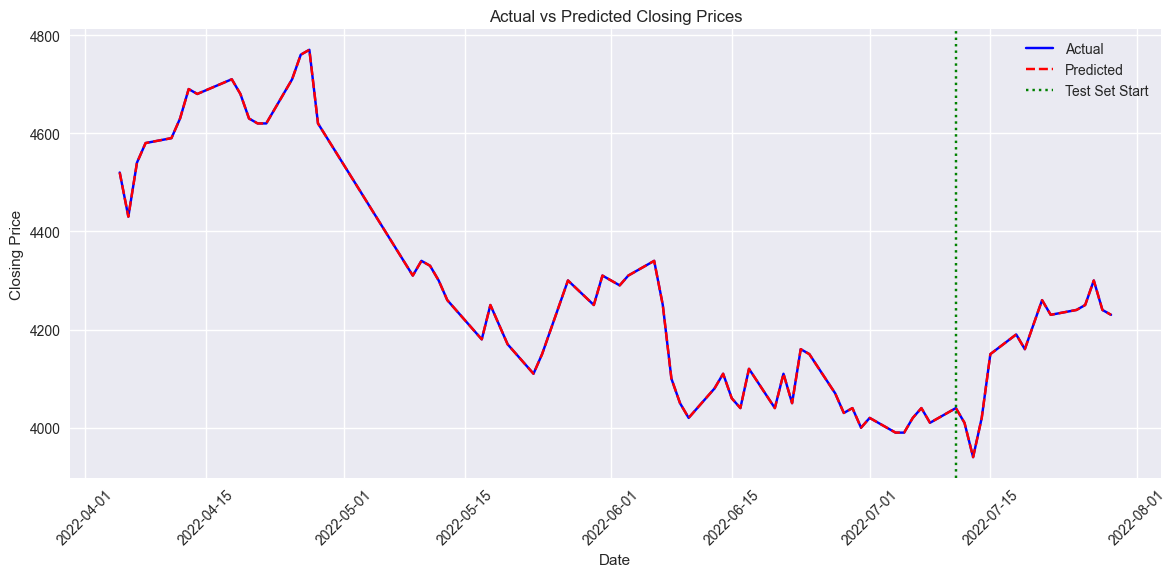

In [87]:
# Plot
plt.figure(figsize=(12, 6))
plt.plot(results_df['date'], results_df['actual'], label='Actual', color='blue')
plt.plot(results_df['date'], results_df['predicted'], label='Predicted', color='red', linestyle='--')

# Highlight the test set
test_start_date = X_test.index.min()
plt.axvline(x=df.loc[test_start_date, 'date'], color='green', linestyle=':', label='Test Set Start')

plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

d:\htdocs\data-analytics-python\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
d:\htdocs\data-analytics-python\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
d:\htdocs\data-analytics-python\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
d:\htdocs\data-analytics-python\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
d:\htdocs\data-analytics-python\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
d:\htdocs\data-analytics-

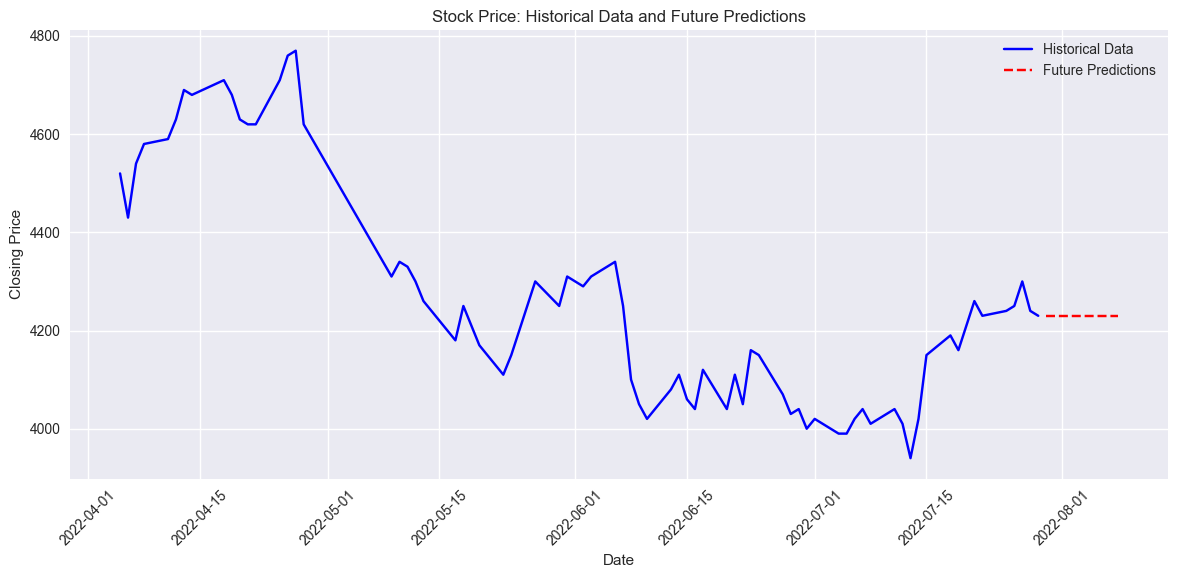

        date  predicted_close
0 2022-07-30      4230.069729
1 2022-07-31      4230.069729
2 2022-08-01      4230.069729
3 2022-08-02      4230.069729
4 2022-08-03      4230.069729
5 2022-08-04      4230.069729
6 2022-08-05      4230.069729
7 2022-08-06      4230.069729
8 2022-08-07      4230.069729
9 2022-08-08      4230.069729


In [90]:
# Fungsi untuk membuat prediksi satu hari ke depan
def predict_next_day(last_day_data, model):
    next_day_pred = model.predict([last_day_data[features].values])[0]
    return next_day_pred

# Jumlah hari yang ingin diprediksi
num_days_to_predict = 10

# Buat list untuk menyimpan prediksi
future_predictions_list = []

# Mulai dari hari terakhir dalam dataset
last_day = df.iloc[-1]
current_date = last_day['date']

for i in range(num_days_to_predict):
    # Prediksi untuk hari berikutnya
    next_day_close = predict_next_day(last_day, model)
    
    # Tambahkan satu hari ke tanggal
    current_date += pd.Timedelta(days=1)
    
    # Tambahkan prediksi ke list
    future_predictions_list.append({
        'date': current_date,
        'predicted_close': next_day_close
    })
    
    # Update 'last_day' untuk prediksi berikutnya
    last_day = last_day.copy()
    last_day['date'] = current_date
    last_day['close'] = next_day_close

# Buat DataFrame dari list prediksi
future_predictions = pd.DataFrame(future_predictions_list)

# Plot hasil
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['close'], label='Historical Data', color='blue')
plt.plot(future_predictions['date'], future_predictions['predicted_close'], label='Future Predictions', color='red', linestyle='--')

plt.title('Stock Price: Historical Data and Future Predictions')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(future_predictions)